Первая часть. 
Базовое решение системы ДУ без элементов анализа ошибок и зависимостей от параметров.

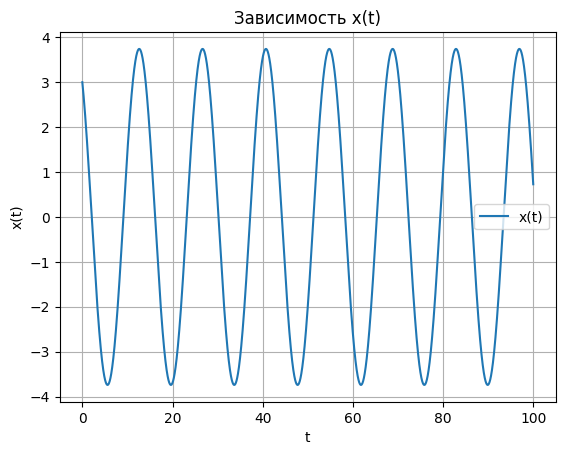

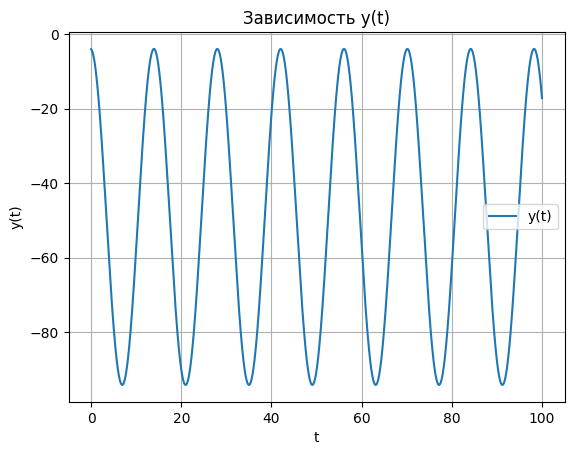

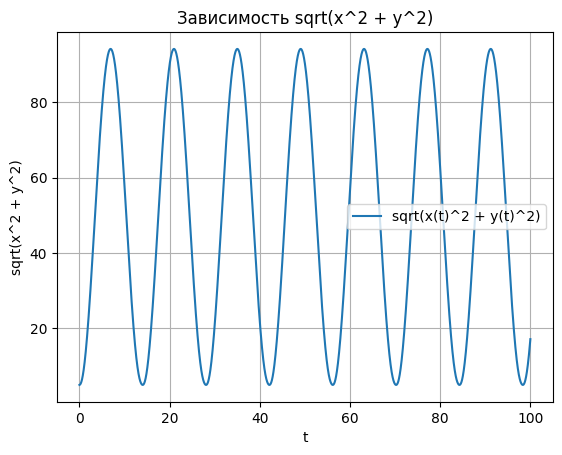

In [267]:
import numpy as np
import matplotlib.pyplot as plt

# Функция, задающая систему дифференциальных уравнений
def equations(t, y, m, L, T):
    x, u, y, v = y
    g = 9.81 + 0.05 * np.sin(2 * np.pi * t)
    dxdt = u
    dudt = - T * x / (m * L)
    dydt = v
    dvdt = - T * y / (m * L) - g
    return [dxdt, dudt, dydt, dvdt]

# Начальные условия и параметры
T = 1.0
m = 1.0
L = 5.0  # Произвольное значение L, так как x^2 + y^2 = L^2
initial_conditions = [3, -1, -4, -1]  # x(0) = 3, y(0) = -4, x'(0) = -1, y'(0) = -1
t_span = (0, 100)  # временной интервал для решения уравнений
dt = 0.01  # шаг по времени

# Решение системы уравнений методом Рунге-Кутты
t_values = np.arange(t_span[0], t_span[1], dt) # временная сетка
y_values = np.zeros((len(t_values), len(initial_conditions)))

y_values[0] = initial_conditions

for i in range(1, len(t_values)):
    k1 = equations(t_values[i-1], y_values[i-1], m, L, T) # коэффициенты метода Рунге-Кутты по таблице Бутчера
    k2 = equations(t_values[i-1] + dt/2, y_values[i-1] + dt/2*np.array(k1), m, L, T)
    k3 = equations(t_values[i-1] + dt/2, y_values[i-1] + dt/2*np.array(k2), m, L, T)
    k4 = equations(t_values[i-1] + dt, y_values[i-1] + dt*np.array(k3), m, L, T)
    y_values[i] = y_values[i-1] + dt/6 * (np.array(k1) + 2*np.array(k2) + 2*np.array(k3) + np.array(k4))


# Построение графика x(t)
plt.figure()
plt.plot(t_values, y_values[:, 0], label='x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Зависимость x(t)')
plt.grid(True)
plt.legend()
plt.show()

# Построение графика y(t)
plt.figure()
plt.plot(t_values, y_values[:, 2], label='y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Зависимость y(t)')
plt.grid(True)
plt.legend()
plt.show()

# Построение графика sqrt(x(t)^2 + y(t)^2)
plt.figure()
plt.plot(t_values, np.sqrt(y_values[:, 0] ** 2 + y_values[:, 2] ** 2), label='sqrt(x(t)^2 + y(t)^2)')
plt.xlabel('t')
plt.ylabel('sqrt(x^2 + y^2)')
plt.title('Зависимость sqrt(x^2 + y^2)')
plt.grid(True)
plt.legend()
plt.show()

Вторая часть. Аналитическое решение (вывод см. в презентации)

In [268]:
# Функция аналитического решения для траектории x(t)
def solution4x (t, L, m, T):
    return 3 * np.cos(((T / (L * m)) ** 0.5) * t) - (((L * m) / T) ** 0.5) * np.sin(((T / (L * m)) ** 0.5) * t)

In [269]:
# Функция аналитического решения для траектории y(t)
def solution4y(t, L, m, T):
    return (1/(T*(-39.478417604357425*L*m + 1*T)))*((-387.2832766987465*L**2*m**2 + 167.72367041742967*L*m*T - 3.9999999999999996*T**2)*np.cos((1*t*np.sqrt(T))/(np.sqrt(L)*np.sqrt(m))) + L*m*(387.2832766987465*L*m - 9.81*T - 0.05*T*np.sin(6.283185307179586*t)) + np.sqrt(L)*np.sqrt(m)*(39.792576869716406*L*m - 1*T)*np.sqrt(T)*np.sin((1*t*np.sqrt(T))/(np.sqrt(L)*np.sqrt(m))))

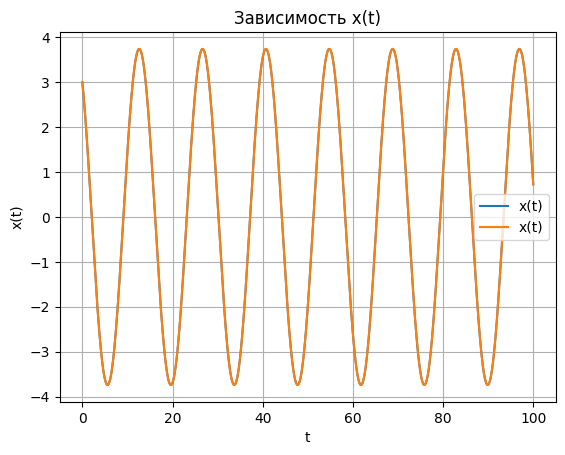

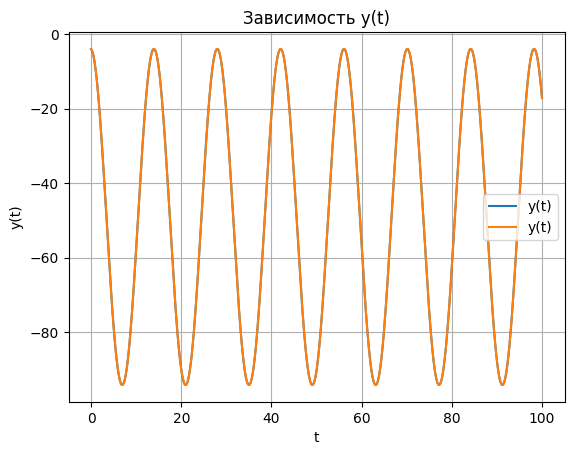

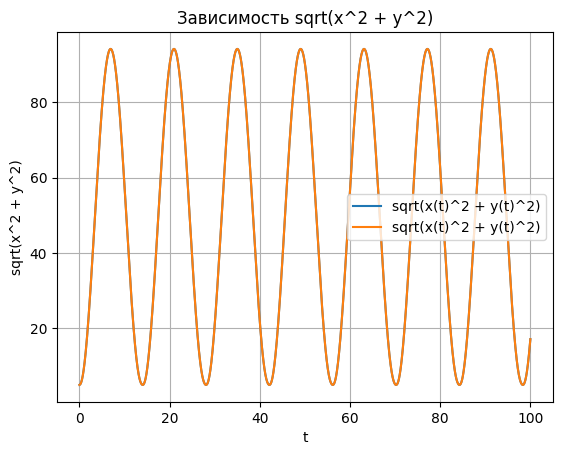

In [270]:
# Построение графиков аналитики и численного решения x(t)
plt.figure()
plt.plot(t_values, solution4x(t_values, 5, 1,1), t_values, y_values[:, 0], label='x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Зависимость x(t)')
plt.grid(True)
plt.legend()
plt.show()

# Построение графиков аналитики и численного решения y(t)
plt.figure()
plt.plot(t_values, solution4y(t_values, 5, 1,1), t_values,y_values[:, 2], label='y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Зависимость y(t)')
plt.grid(True)
plt.legend()
plt.show()

# Построение графиков аналитики и численного решения sqrt(x(t)^2 + y(t)^2)
plt.figure()
plt.plot(t_values, np.sqrt(y_values[:, 0] ** 2 + y_values[:, 2] ** 2), t_values, (solution4y(t_values, 5, 1,1) ** 2 + solution4x(t_values, 5, 1,1) ** 2) ** 0.5, label='sqrt(x(t)^2 + y(t)^2)')
plt.xlabel('t')
plt.ylabel('sqrt(x^2 + y^2)')
plt.title('Зависимость sqrt(x^2 + y^2)')
plt.grid(True)
plt.legend()
plt.show()

Третья часть. Сравнение ошибки в ходе одного решения с заданным ранее шагом временной сетки dt = 0.01

In [271]:
# Создаем последующие массивы для записи ошибок
errorx = np.zeros(len(t_values))
errory = np.zeros(len(t_values))
errorl = np.zeros(len(t_values))

In [272]:
# Расчет ошибки в каждый момент временной сетки
for i in range(len(t_values)):
    errorx[i] = y_values[i, 0] - solution4x(t_values[i], L, m, T)
    errory[i] = y_values[i, 2] - solution4y(t_values[i], L, m, T)
    errorl[i] = np.sqrt(y_values[i, 0] ** 2 + y_values[i, 2] ** 2) - (solution4y(t_values[i], 5, 1,1) ** 2 + solution4x(t_values[i], 5, 1,1) ** 2) ** 0.5

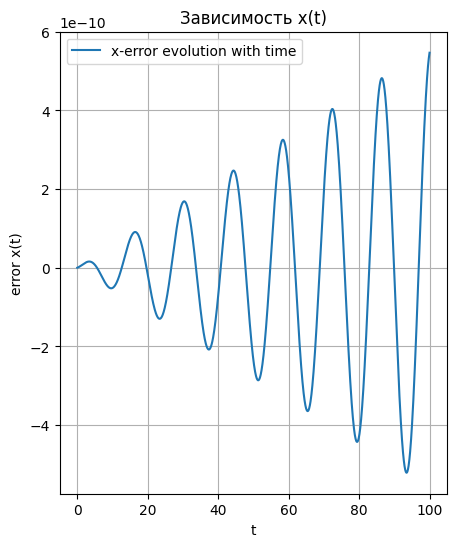

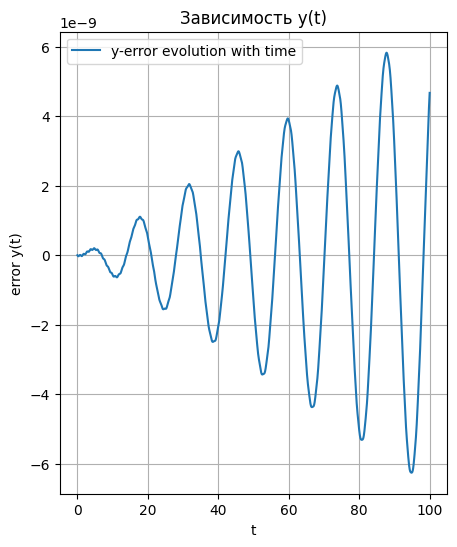

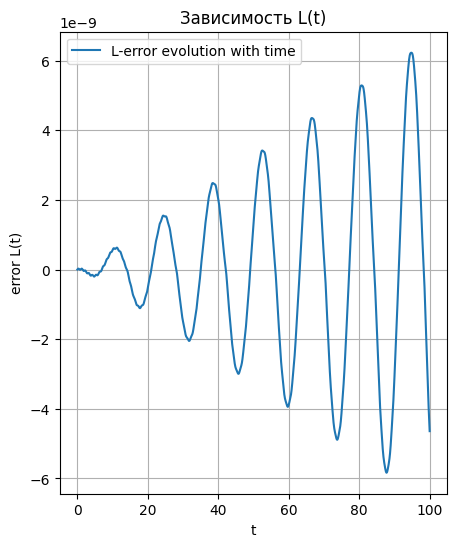

In [273]:
# Построение графиков ошибки между аналитическим решением и численным в каждый момент времени для x(t)
plt.figure(figsize=(5, 6))
plt.plot(t_values, errorx, label='x-error evolution with time')
plt.xlabel('t')
plt.ylabel('error x(t)')
plt.title('Зависимость x(t)')
plt.grid(True)
plt.legend()
plt.show()

# Построение графиков ошибки между аналитическим решением и численным в каждый момент времени для y(t)
plt.figure(figsize=(5, 6))
plt.plot(t_values, errory, label='y-error evolution with time')
plt.xlabel('t')
plt.ylabel('error y(t)')
plt.title('Зависимость y(t)')
plt.grid(True)
plt.legend()
plt.show()

# Построение графиков ошибки между аналитическим решением и численным в каждый момент времени для L(t)
plt.figure(figsize=(5, 6))
plt.plot(t_values, errorl, label='L-error evolution with time')
plt.xlabel('t')
plt.ylabel('error L(t)')
plt.title('Зависимость L(t)')
plt.grid(True)
plt.legend()
plt.show()

Четвертая часть. Анализ эволюции ошибки по мере изменения шага сетки dt от 0.001 до 0.5

In [274]:
dt_mass = np.linspace(0.001, 0.5, 100) # разные шаги сетки

# Создаем последующие массивы эволюции ошибок в зависимости от шага временной сетки
x_errors_evolution_dt = np.zeros(len(dt_mass))
y_errors_evolution_dt = np.zeros(len(dt_mass))
l_errors_evolution_dt = np.zeros(len(dt_mass))

In [275]:
# Солвер для анализа эволюции ошибки в зависимости от шага временнной сетки. Все то же самое, что в предыдущем коде для базового решения, но с добавлением блока для ошибок
def solver4errors(T, m, L, dt):
    initial_conditions = [3, -1, -4, -1]
    t_span = (0, 100)

    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), len(initial_conditions)))

    y_values[0] = initial_conditions

    for i in range(1, len(t_values)):
        k1 = equations(t_values[i-1], y_values[i-1], m, L, T)
        k2 = equations(t_values[i-1] + dt/2, y_values[i-1] + dt/2*np.array(k1), m, L, T)
        k3 = equations(t_values[i-1] + dt/2, y_values[i-1] + dt/2*np.array(k2), m, L, T)
        k4 = equations(t_values[i-1] + dt, y_values[i-1] + dt*np.array(k3), m, L, T)
        y_values[i] = y_values[i-1] + dt/6 * (np.array(k1) + 2*np.array(k2) + 2*np.array(k3) + np.array(k4))

    # Блок расчета ошибки. Возвращаем первую норму - максимальное значение ошибки при определенном dt
    errorx = np.zeros(len(t_values))
    errory = np.zeros(len(t_values))
    errorl = np.zeros(len(t_values))

    for i in range(len(t_values)):
        errorx[i] = y_values[i, 0] - solution4x(t_values[i], L, m, T)
        errory[i] = y_values[i, 2] - solution4y(t_values[i], L, m, T)
        errorl[i] = np.sqrt(y_values[i, 0] ** 2 + y_values[i, 2] ** 2) - (solution4y(t_values[i], 5, 1,1) ** 2 + solution4x(t_values[i], 5, 1,1) ** 2) ** 0.5
    
    return max(errorx), max(errory), max(errorl)



In [276]:
# Считаем ошибки для каждого элемента из массива шагов сетки dt_mass
for i in range(len(dt_mass)):
    x_errors_evolution_dt[i], y_errors_evolution_dt[i], l_errors_evolution_dt[i] = solver4errors(1, 1, 5, dt_mass[i])

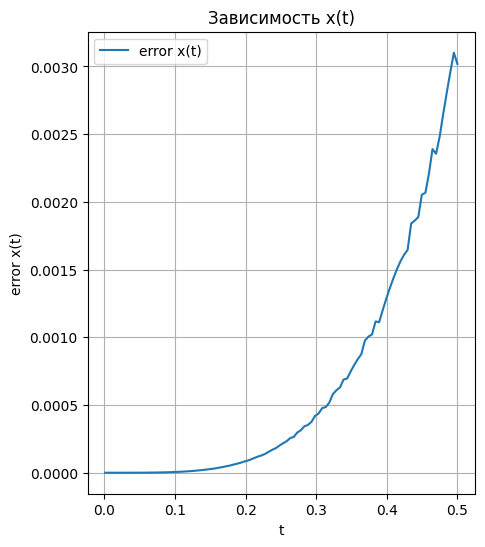

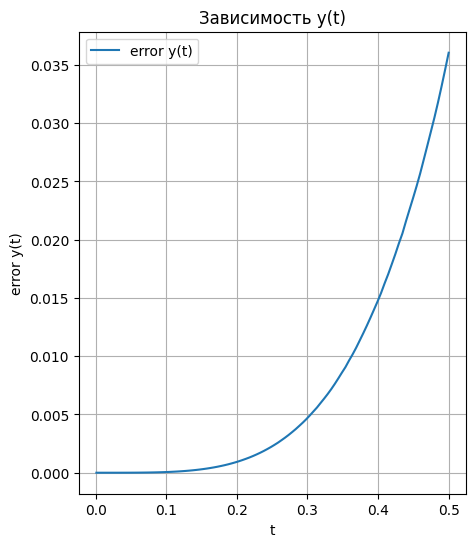

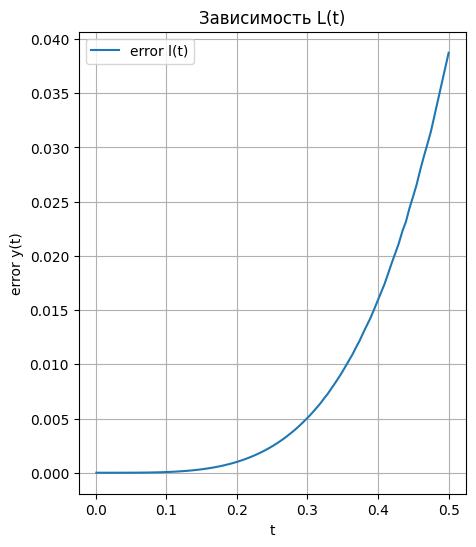

In [277]:
# Выводим графики ошибки в зависимости от шага сетки для x(t)
plt.figure(figsize=(5, 6))
plt.plot(dt_mass, x_errors_evolution_dt, label='error x(t)')
plt.xlabel('t')
plt.ylabel('error x(t)')
plt.title('Зависимость x(t)')
plt.grid(True)
plt.legend()
plt.show()

# Выводим графики ошибки в зависимости от шага сетки для y(t)
plt.figure(figsize=(5, 6))
plt.plot(dt_mass, y_errors_evolution_dt, label='error y(t)')
plt.xlabel('t')
plt.ylabel('error y(t)')
plt.title('Зависимость y(t)')
plt.grid(True)
plt.legend()
plt.show()

# Выводим графики ошибки в зависимости от шага сетки для L(t)
plt.figure(figsize=(5, 6))
plt.plot(dt_mass, l_errors_evolution_dt, label='error l(t)')
plt.xlabel('t')
plt.ylabel('error y(t)')
plt.title('Зависимость L(t)')
plt.grid(True)
plt.legend()
plt.show()

Пятая часть. Анализ траекторий в зависимости от значений параметров L, m, T

In [278]:
# Вводим массивы различных параметров для L, m, T
T_mass = np.linspace(1, 50, 5)
m_mass = np.linspace(1, 50, 5)
L_mass = np.linspace(5, 50, 5)

In [279]:
# Солвер для анализа зависимости от параметров. Принимает на вход T, m, L и финальное время завершения расчета t_final
def solver4analysis(T, m, L, t_final):
    initial_conditions = [3, -1, -4, -1] 
    t_span = (0, t_final) 
    dt = 0.01

    t_values = np.arange(t_span[0], t_span[1], dt)
    y_values = np.zeros((len(t_values), len(initial_conditions)))

    y_values[0] = initial_conditions

    for i in range(1, len(t_values)):
        k1 = equations(t_values[i-1], y_values[i-1], m, L, T)
        k2 = equations(t_values[i-1] + dt/2, y_values[i-1] + dt/2*np.array(k1), m, L, T)
        k3 = equations(t_values[i-1] + dt/2, y_values[i-1] + dt/2*np.array(k2), m, L, T)
        k4 = equations(t_values[i-1] + dt, y_values[i-1] + dt*np.array(k3), m, L, T)
        y_values[i] = y_values[i-1] + dt/6 * (np.array(k1) + 2*np.array(k2) + 2*np.array(k3) + np.array(k4))

    return y_values # возвращаем массив решения в зависимости от введенных L, m, T, t_final

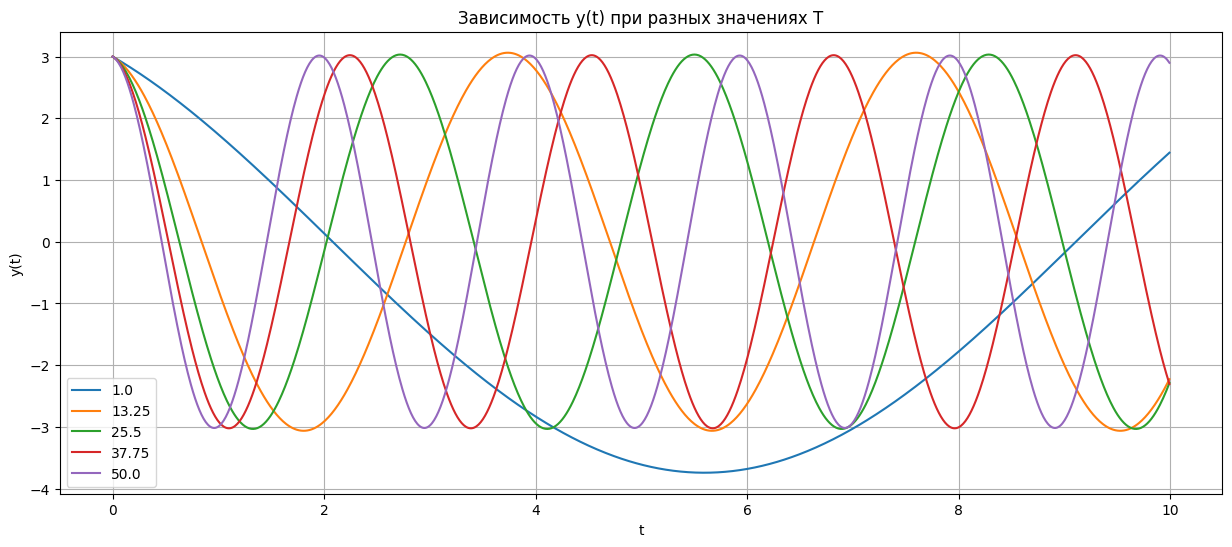

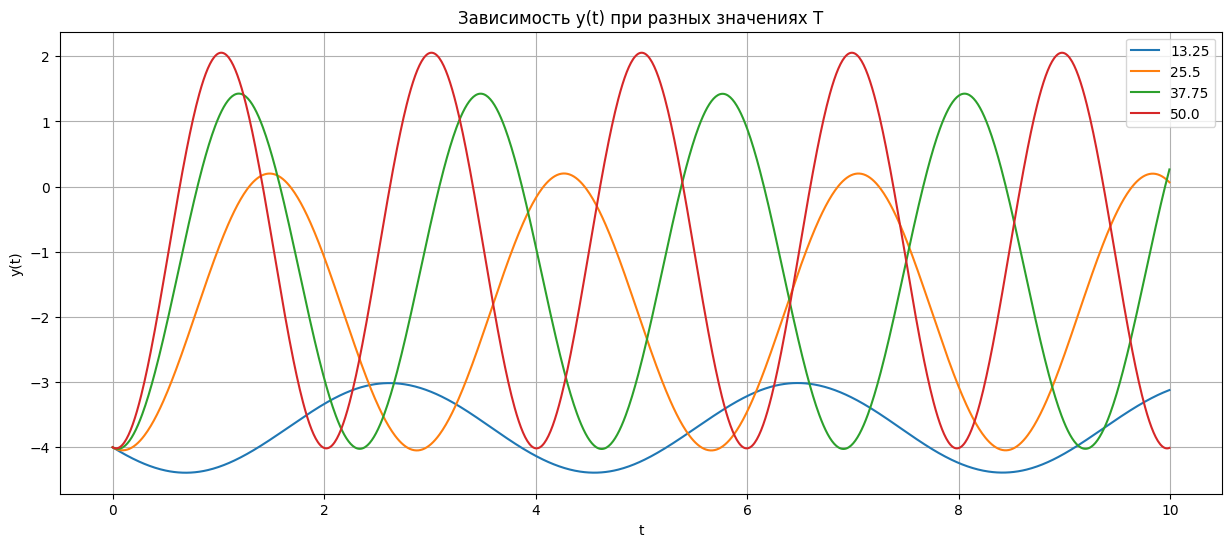

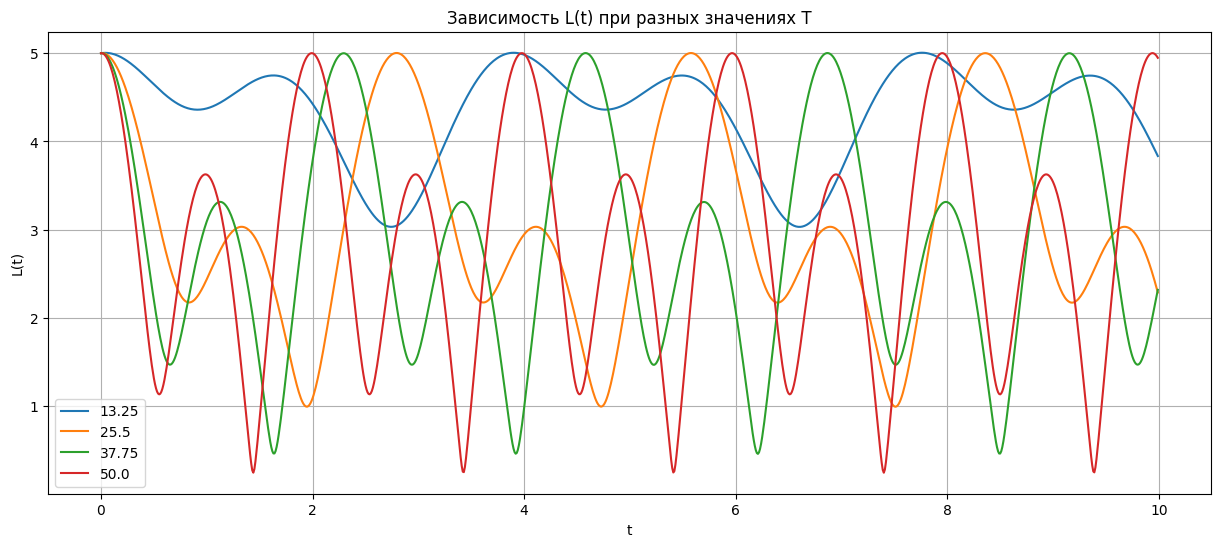

In [281]:
# Выводим несколько графиков x(t) при разных T (значения T подписываются в легенде графика)
plt.figure(figsize=(15, 6))
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[0], 1, 5, 10)[:,0], label=T_mass[0])
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[1], 1, 5, 10)[:,0], label=T_mass[1])
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[2], 1, 5, 10)[:,0], label=T_mass[2])
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[3], 1, 5, 10)[:,0], label=T_mass[3])
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[4], 1, 5, 10)[:,0], label=T_mass[4])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Зависимость y(t) при разных значениях Т')
plt.grid(True)
plt.legend()
plt.show()

# Выводим несколько графиков y(t) при разных T (значения T подписываются в легенде графика)
plt.figure(figsize=(15, 6))
# plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[0], 1, 5, 10)[:,0], label=T_mass[0])
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[1], 1, 5, 10)[:,2], label=T_mass[1])
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[2], 1, 5, 10)[:,2], label=T_mass[2])
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[3], 1, 5, 10)[:,2], label=T_mass[3])
plt.plot(np.arange(0, 10, 0.01), solver4analysis(T_mass[4], 1, 5, 10)[:,2], label=T_mass[4])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Зависимость y(t) при разных значениях Т')
plt.grid(True)
plt.legend()
plt.show()

# Выводим несколько графиков L(t) при разных T (значения T подписываются в легенде графика)
plt.figure(figsize=(15, 6))
# plt.plot(np.arange(0, 10, 0.01), np.sqrt((solver4analysis(T_mass[0], 1, 5, 10)[:,0]) ** 2 + (solver4analysis(T_mass[0], 1, 5, 10)[:,2]) ** 2), label=T_mass[0])
plt.plot(np.arange(0, 10, 0.01), np.sqrt((solver4analysis(T_mass[1], 1, 5, 10)[:,0]) ** 2 + (solver4analysis(T_mass[1], 1, 5, 10)[:,2]) ** 2), label=T_mass[1])
plt.plot(np.arange(0, 10, 0.01), np.sqrt((solver4analysis(T_mass[2], 1, 5, 10)[:,0]) ** 2 + (solver4analysis(T_mass[2], 1, 5, 10)[:,2]) ** 2), label=T_mass[2])
plt.plot(np.arange(0, 10, 0.01), np.sqrt((solver4analysis(T_mass[3], 1, 5, 10)[:,0]) ** 2 + (solver4analysis(T_mass[3], 1, 5, 10)[:,2]) ** 2), label=T_mass[3])
plt.plot(np.arange(0, 10, 0.01), np.sqrt((solver4analysis(T_mass[4], 1, 5, 10)[:,0]) ** 2 + (solver4analysis(T_mass[4], 1, 5, 10)[:,2]) ** 2), label=T_mass[4])
plt.xlabel('t')
plt.ylabel('L(t)')
plt.title('Зависимость L(t) при разных значениях Т')
plt.grid(True)
plt.legend()
plt.show()



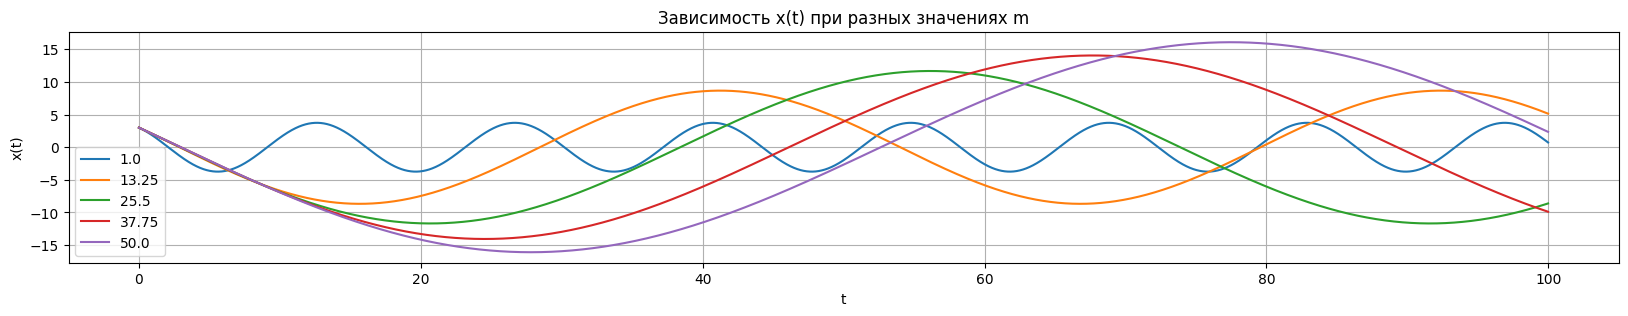

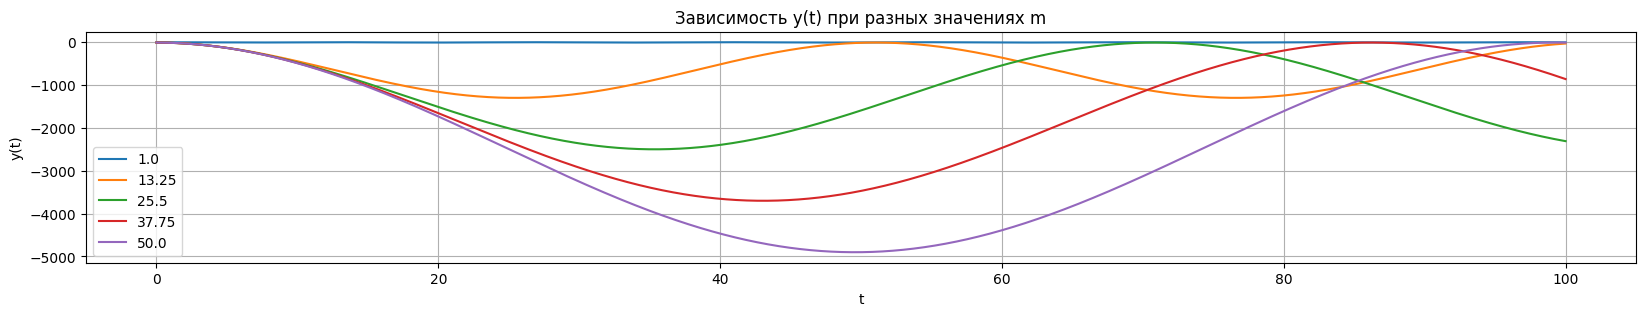

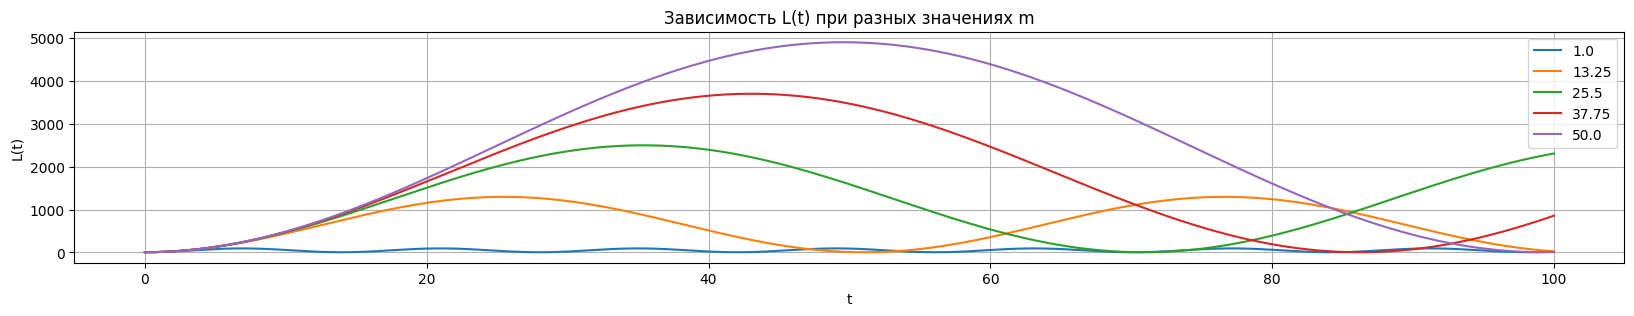

In [282]:
# Выводим несколько графиков x(t) при разных m (значения m подписываются в легенде графика)
plt.figure(figsize=(20, 3))
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], 5, 100)[:,0], label=m_mass[0])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[1], 5, 100)[:,0], label=m_mass[1])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[2], 5, 100)[:,0], label=m_mass[2])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[3], 5, 100)[:,0], label=m_mass[3])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[4], 5, 100)[:,0], label=m_mass[4])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Зависимость х(t) при разных значениях m')
plt.grid(True)
plt.legend()
plt.show()

# Выводим несколько графиков y(t) при разных m (значения m подписываются в легенде графика)
plt.figure(figsize=(20, 3))
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], 5, 100)[:,0], label=m_mass[0])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[1], 5, 100)[:,2], label=m_mass[1])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[2], 5, 100)[:,2], label=m_mass[2])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[3], 5, 100)[:,2], label=m_mass[3])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[4], 5, 100)[:,2], label=m_mass[4])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Зависимость y(t) при разных значениях m')
plt.grid(True)
plt.legend()
plt.show()

# Выводим несколько графиков L(t) при разных m (значения m подписываются в легенде графика)
plt.figure(figsize=(20, 3))
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[0], 5, 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[0], 5, 100)[:,2]) ** 2), label=m_mass[0])
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[1], 5, 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[1], 5, 100)[:,2]) ** 2), label=m_mass[1])
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[2], 5, 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[2], 5, 100)[:,2]) ** 2), label=m_mass[2])
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[3], 5, 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[3], 5, 100)[:,2]) ** 2), label=m_mass[3])
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[4], 5, 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[4], 5, 100)[:,2]) ** 2), label=m_mass[4])
plt.xlabel('t')
plt.ylabel('L(t)')
plt.title('Зависимость L(t) при разных значениях m')
plt.grid(True)
plt.legend()
plt.show()

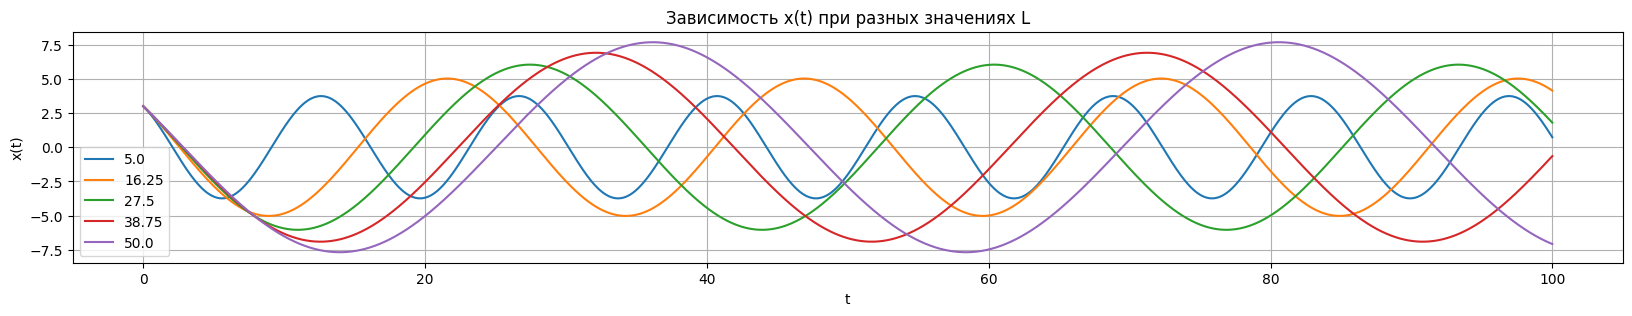

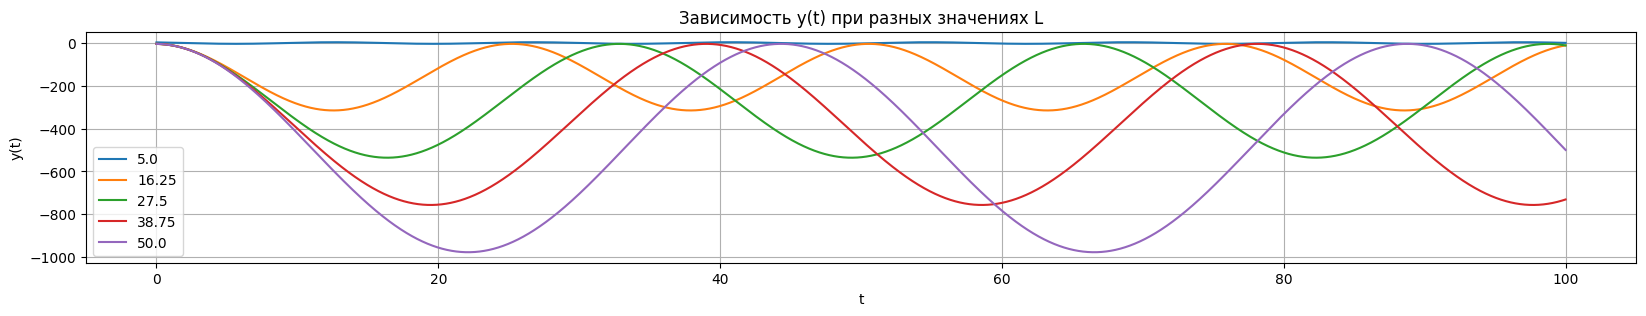

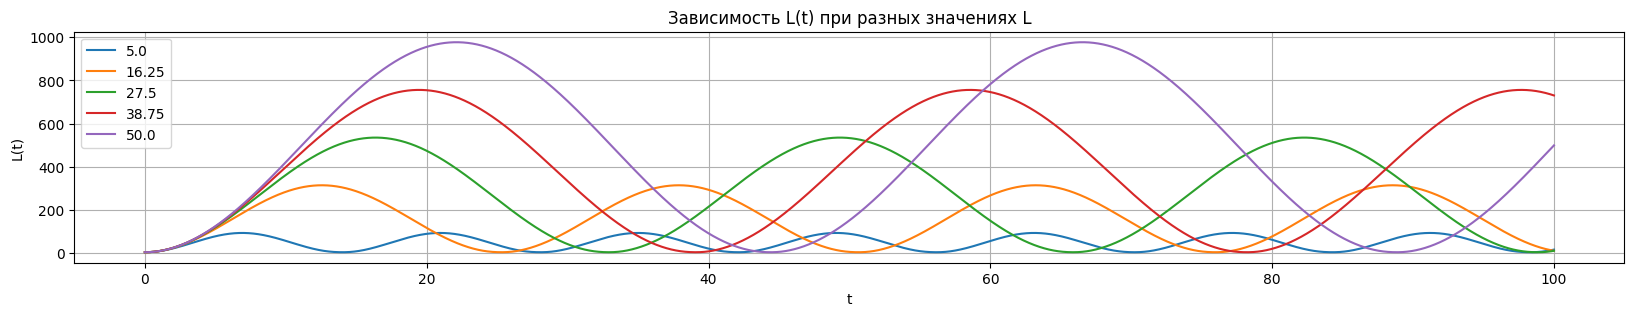

In [283]:
# Выводим несколько графиков x(t) при разных L (значения L подписываются в легенде графика)
plt.figure(figsize=(20, 3))
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[0], 100)[:,0], label=L_mass[0])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[1], 100)[:,0], label=L_mass[1])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[2], 100)[:,0], label=L_mass[2])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[3], 100)[:,0], label=L_mass[3])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[4], 100)[:,0], label=L_mass[4])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Зависимость х(t) при разных значениях L')
plt.grid(True)
plt.legend()
plt.show()

# Выводим несколько графиков y(t) при разных L (значения L подписываются в легенде графика)
plt.figure(figsize=(20, 3))
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[0], 100)[:,0], label=L_mass[0])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[1], 100)[:,2], label=L_mass[1])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[2], 100)[:,2], label=L_mass[2])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[3], 100)[:,2], label=L_mass[3])
plt.plot(np.arange(0, 100, 0.01), solver4analysis(T_mass[0], m_mass[0], L_mass[4], 100)[:,2], label=L_mass[4])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Зависимость y(t) при разных значениях L')
plt.grid(True)
plt.legend()
plt.show()

# Выводим несколько графиков L(t) при разных L (значения L подписываются в легенде графика)
plt.figure(figsize=(20, 3))
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[0], L_mass[0], 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[0], L_mass[0], 100)[:,2]) ** 2), label=L_mass[0])
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[0], L_mass[1], 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[0], L_mass[1], 100)[:,2]) ** 2), label=L_mass[1])
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[0], L_mass[2], 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[0], L_mass[2], 100)[:,2]) ** 2), label=L_mass[2])
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[0], L_mass[3], 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[0], L_mass[3], 100)[:,2]) ** 2), label=L_mass[3])
plt.plot(np.arange(0, 100, 0.01), np.sqrt((solver4analysis(T_mass[0], m_mass[0], L_mass[4], 100)[:,0]) ** 2 + (solver4analysis(T_mass[0], m_mass[0], L_mass[4], 100)[:,2]) ** 2), label=L_mass[4])
plt.xlabel('t')
plt.ylabel('L(t)')
plt.title('Зависимость L(t) при разных значениях L')
plt.grid(True)
plt.legend()
plt.show()